# Data Analytics: Homework 2

### Authors: Matthew Leong, Shruti Kapur, Hyeon Gu Kim



### Setup:

In [1]:
#Code block to import in various modules/libraries
from pandas import Series,DataFrame
import pandas as pd
%pylab inline

df = pd.read_csv('NYC_Restaurants.csv', dtype=str)

Populating the interactive namespace from numpy and matplotlib


## Q1) Create a unique name for each restaurant.

In [2]:
# concatenate values of each columns
df['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + df['STREET'] + ' ' + df['ZIPCODE'] + ' ' + df['BORO']
df.dropna()
df[:10]

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,RESTAURANT
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469FLATBUSH AVENUE 11225 BROOKLYN
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469FLATBUSH AVENUE 11225 BROOKLYN
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469FLATBUSH AVENUE 11225 BROOKLYN
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469FLATBUSH AVENUE 11225 BROOKLYN
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469FLATBUSH AVENUE 11225 BROOKLYN
5,5,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-2263 ROAD 11374 QUEENS
6,6,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-2263 ROAD 11374 QUEENS
7,7,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-2263 ROAD 11374 QUEENS
8,8,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-2263 ROAD 11374 QUEENS
9,9,40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825,ASTORIA BOULEVARD,11369,7183350505,American,11/15/2014,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,38,Z,11/15/2014,02/12/2015,Cycle Inspection / Re-inspection,BRUNOS ON THE BOULEVARD 8825ASTORIA BOULEVARD ...


## Q2) How many restaurants are included in the data?

Markdown text

In [3]:
# counts all restaurants
df2 = df.drop_duplicates(subset="RESTAURANT")
len(df2)

10114

## Q3) How many chains are there? 

Markdown text

In [4]:
# create 'chain' mask and selects only chain restaurants
chains = df[['DBA', 'RESTAURANT']].drop_duplicates()['DBA'].value_counts()
chains = chains[chains >= 2]
len(chains)

368

## Q4) Plot a bar graph of the top 20 most popular chains.

Markdown text

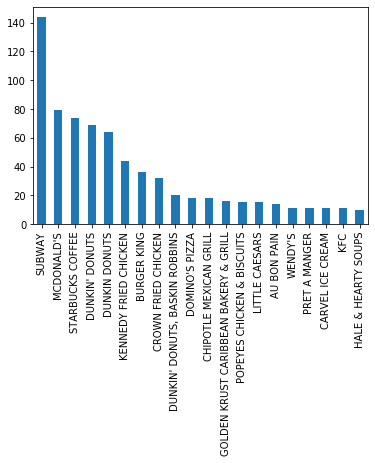

In [5]:
# use sor_values() in order to sort in descending order and plot only top 20 of it.
top_20_chains = chains.sort_values(ascending=False)
top_20_chains[:20].plot(kind='bar')

## Q5) What fraction of all restaurants are chain restaurants?

Markdown text

In [6]:
# fraction of all restaurants are chain restaurants
len(chains) / len(df['RESTAURANT'].value_counts())

0.036385208621712475

## Q6) Plot the number of non-chain restaurants in each boro.

Markdown text

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


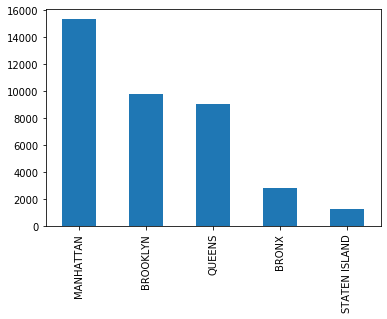

In [7]:
# first find all non-chain restaurants
non_chains = df[['DBA', 'RESTAURANT']].drop_duplicates()['DBA'].value_counts()
non_chains = non_chains[non_chains == 1]

def is_not_chain(s):
    return s in non_chains

# plot the number of such restaurants by boro (w/out 'missing' boro)
mask = df['BORO'] != 'Missing'
mask2 = df['DBA'].map(is_not_chain)
no_chain_df = df[mask][mask2]
no_chain_df['BORO'].value_counts().plot(kind='bar')

## Q7) Plot the fraction of non-chain restaurants in each boro.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


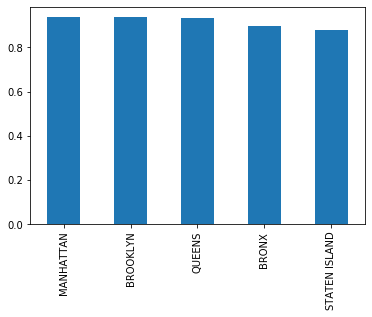

In [8]:
# Removing the 'missing' values through a mask
mask2 = (df2['BORO']!='Missing')

# Calculating the total non chain restaurants and total restaurants
df3 = df2[df2['DBA'].map(df2['DBA'].value_counts()) == 1]
vc_non_chain = df3[mask][['DBA','BORO']].dropna(how="any").drop_duplicates()['BORO'].value_counts()
vc_total = df2[mask2][['DBA','BORO']].dropna(how="any").drop_duplicates()['BORO'].value_counts()

# Calculating non chain restaurants as a fraction of the total
vc_fraction = vc_non_chain / vc_total

# Plotting the fractions for each borough
vc_fraction.plot(kind="bar")

## Q8) Plot the popularity of cuisines.

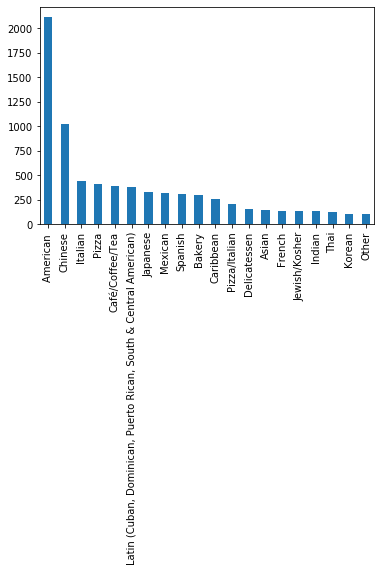

In [9]:
# Creating dataframe of the cuisines among restaurants
popular_cuisines = df2[['CUISINE DESCRIPTION','DBA']].dropna(how="any").drop_duplicates()["CUISINE DESCRIPTION"].value_counts()

# Plotting the cuisines based on popularity
popular_cuisines[:20].plot(kind="bar")

## Q9) Plot the cuisines among restaurants which never got cited for violations.

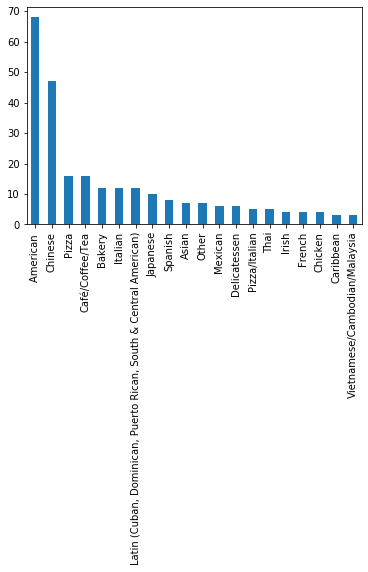

In [10]:
# Creating a mask to find restaurants which were never cited for violations
mask3 = df2['VIOLATION CODE'].isnull()

# Creating dataframe of the cuisines among restaurants which never got cited for violations
popular_cuisines = df2[mask3][['CUISINE DESCRIPTION','DBA']].dropna(how="any").drop_duplicates()["CUISINE DESCRIPTION"].value_counts()

# Plotting the top cuisines among the 'clean' restaurants
popular_cuisines[:20].plot(kind="bar")

## Q10) What cuisines tend to be the cleanest"?

In [11]:
# Selecting all cuisines for which there are atleast 20 restaurants representing that cuisine
df4 = df2[df2['CUISINE DESCRIPTION'].map(df2['CUISINE DESCRIPTION'].value_counts())>=20]

# Creating a mask to select the restaurants with no violations
mask4 = df4['VIOLATION CODE'].isnull()

# Calculating the top 20 popular cuisines and top 20 'clean' popular cuisines
popular_cuisines_top_20 = df4[['CUISINE DESCRIPTION','DBA']].dropna(how="any").drop_duplicates()["CUISINE DESCRIPTION"].value_counts()
clean_popular_cuisines_top20 = df4[mask4][['CUISINE DESCRIPTION','DBA']].dropna(how="any").drop_duplicates()["CUISINE DESCRIPTION"].value_counts()

# Calculating ratio of restaurants which never got cited versus total number of restaurants,for each cuisine
clean_cuisine_ratio = clean_popular_cuisines_top20 / popular_cuisines_top_20

# Printing out the top 10 cuisines with highest ratio
clean_cuisine_ratio.dropna().sort_values(ascending=False)[:10]

Donuts                            0.120000
Vietnamese/Cambodian/Malaysia     0.100000
Soul Food                         0.090909
Soups & Sandwiches                0.083333
Hamburgers                        0.068182
Other                             0.067961
Irish                             0.057143
Chicken                           0.051948
Sandwiches/Salads/Mixed Buffet    0.050000
Barbecue                          0.050000
Name: CUISINE DESCRIPTION, dtype: float64

## Q11) What are the most common violations in each borough?

For this problem, a table was created using the crosstab function in pandas. Then the idxmax function was used to identify the most common description for each borough. 



In [12]:
#There are some missing values that got caught in the table. Therefore get rid of them with a mask.
no_missing_mask = (df['BORO']!='Missing')
#Create table using crosstab. Rows are the boroughs and the columns are the descriptions.
table = pd.crosstab(df[no_missing_mask]['BORO'],df[no_missing_mask]['VIOLATION DESCRIPTION'])

#Using axis = 1 to specify get the column id for each row.
#default of axis = 0 would get the row ID for each column.
most_common = DataFrame({'Most common violation description':table.idxmax(axis = 1), 'Frequency of violation':table.max(axis = 1)})
#call the df to show output.
most_common

,Most common violation description,Frequency of violation
BORO,,
BRONX,Non-food contact surface improperly constructe...,500
BROOKLYN,Non-food contact surface improperly constructe...,1485
MANHATTAN,Non-food contact surface improperly constructe...,2417
QUEENS,Non-food contact surface improperly constructe...,1416
STATEN ISLAND,Non-food contact surface improperly constructe...,230


## Q12) What are the most common violations per borough, after normalizing for the relative abundance of each violation?

In this problem, normalization is done by first getting the frequencies of the violation description. Then pandas will divide the table with those frequencies. Pandas is pretty smart and only will divide if the description matches. While the code is not shown, there were some tests to see if the division goes through on say 'VIOLATION CODE'. For that table, dividing by violationFrequency yielded NaNs. Thus the simple line of code of table/violationFrequency should yield the correct normalized result.

In [13]:
#Get all the violation descriptions in to one df. Use value counts to get frequencies
violationFrequency = df['VIOLATION DESCRIPTION'].value_counts()
#Divide table from problem 11 with the violation frequency to normalize it.
norm_table = table/violationFrequency

#Using axis = 1 to specify get the column id for each row.
#default of axis = 0 would get the row ID for each column.
#norm_most_common to signify that the data has been normalized
norm_most_common = DataFrame({'Most common violation description':norm_table.idxmax(axis = 1), 'Frequency of violation':norm_table.max(axis = 1)})
#call the df to show output
norm_most_common

,Most common violation description,Frequency of violation
BORO,,
BRONX,Unprotected food re-served.,0.500000
BROOKLYN,Precooked potentially hazardous food from comm...,0.714286
MANHATTAN,Out-of package sale of tobacco products observed.,1.000000
QUEENS,Caloric content range (minimum to maximum) not...,1.000000
STATEN ISLAND,"Eggs found dirty/cracked; liquid, frozen or po...",0.090909


In [14]:
#Using axis = 1 to specify get the column id for each row.
#default of axis = 0 would get the row ID for each column.
#norm_most_common to signify that the data has been normalized
norm_most_common = DataFrame({'Most common violation description':norm_table.idxmax(axis = 1), 'Frequency of violation':norm_table.max(axis = 1)})
#call the df to show output
norm_most_common

,Most common violation description,Frequency of violation
BORO,,
BRONX,Unprotected food re-served.,0.500000
BROOKLYN,Precooked potentially hazardous food from comm...,0.714286
MANHATTAN,Out-of package sale of tobacco products observed.,1.000000
QUEENS,Caloric content range (minimum to maximum) not...,1.000000
STATEN ISLAND,"Eggs found dirty/cracked; liquid, frozen or po...",0.090909


## Q13) How many phone area codes correspond to a single zipcode?

For this problem, string conversion and string slicing methods were done on python in order to get the first three phone digits for the area code. An area code column was created in the dataframe and then the dataframe was split into the two relevant columns of area code and zip code. Finding area codes that only had one zip code then was as simple as using a mask containing the condition that there was only one occurence and outputting the result using a print statement.

In [15]:
#Use as type str to convert df to a string. Then perform a string operation/slice on it to get the first 3 characters.
three_digits_phone = df['PHONE'].astype('str').str[0:3]
#Add in a column called AREA CODE so pandas operations work
df['AREA CODE'] = three_digits_phone

#Narrowing down the dataframe to just the relevant columns
area_zip_df = df[['AREA CODE', 'ZIPCODE']]

#Create a mask to find the area codes with only 1 ZIP code
#Condition is which area codes only have one zip code.
#This results in a series filled with True and Falses
unique_area_mask = (area_zip_df['AREA CODE'].value_counts() == 1)
#We can use the mask on itself to get the cases where the condition is true.
#Display output
print("There are this many area codes that correspond with one zip code:", len(unique_area_mask[unique_area_mask]))

There are this many area codes that correspond with one zip code: 9


## Q14) Find common misspellings of street names

This problem required multiple string and list manipulations using built in pandas method to create the columns for 'STREET TYPE', 'STREET BASE', and 'STREET BASE & ZIP'. After those creations, another dataframe was created to drop any reoccurring data across those three columns. Missing values were also dropped from that dataframe. After that cleaning, the dataframe was merged upon itself in order to develop two street type columns. Using pds.crosstab(), those columns were then made into a symmetrical table where certain spellings' i.e. Ave and Avenue occurences were counted. Then an output was displayed to the user for which street types are the following paired with: AVE, ST, RD, PL, BOULEARD, and BULEVARD.Markdown text

In [16]:
#STREET TYPE is a new column with the last word in the name of the street.
#Use pandas nifty built in str methods.
#str.split() essentially splits it into a list of strings with ' ' signifying that the seperation is a blank space.
#str[-1] calls for the last word in the string.
df['STREET TYPE'] = df['STREET'].str.split().str[-1]

#Same as the STREET TYPE only that the index is :-1 aka get everything but the last one.
#Creating STREET BASE column
df['STREET BASE'] = df['STREET'].str.split().str[:-1]
#Convert the list of strings back to a single string.
df['STREET BASE'] = df['STREET BASE'].str.join(sep = ' ')

#Creating STREET BASE & ZIP column.
#This is simply a concatentation between street base and zip code.
#A space is added.
df['STREET BASE & ZIP'] = df['STREET BASE'] + ' ' + df['ZIPCODE']

#Create a new df/table containing just these three columns
#This is done by making a list of the column names.
#And then putting it in the []
df2 = df[['STREET BASE','STREET TYPE','STREET BASE & ZIP']]
#Print out first 5 rows to show it worked.

#Use drop duplicates to drop all the duplicates in street base.
#Parameter ['STREET BASE','STREET TYPE','STREET BASE & ZIP'] to specify all three columns.
df2 = df2.drop_duplicates(subset=['STREET BASE','STREET TYPE','STREET BASE & ZIP'])

#Create a mask containing everything but the '' value.
mask = (df2['STREET BASE'] != '')

#Use mask to drop the blank value.
df2 = df2[mask]

#Use .dropna() to drop any other blank values
df2 = df2.dropna()

#Merge the table together with itself. 
merged_street_table = df2.merge(df2,
                                   left_on='STREET BASE & ZIP',
                                   right_on='STREET BASE & ZIP',
                                   suffixes=['_base', '_zip'])

#Create a mask that captures when the street type is different than the other one.
diff_mask = (merged_street_table['STREET TYPE_base'] != merged_street_table['STREET TYPE_zip'])

#Use pd.crosstab with mask condition to make the new table.
diff_street_table = pd.crosstab(merged_street_table[diff_mask]['STREET TYPE_base'],merged_street_table[diff_mask]['STREET TYPE_zip'])

#Display output for AVE, ST, RD, PL, BOULEARD, and BULEVARD
#axis parameter does not matter here since the table is symmetrical. Default value of axis = 0 used.
print('The street type that has AVE as the most common spelling mistake is:', diff_street_table['AVE'].idxmax())
print('The street type that has ST as the most common spelling mistake is:', diff_street_table['ST'].idxmax())
print('The street type that has RD as the most common spelling mistake is:', diff_street_table['RD'].idxmax())
print('The street type that has PL as the most common spelling mistake is:', diff_street_table['PL'].idxmax())
print('The street type that has BOULEARD as the most common spelling mistake is:', diff_street_table['BOULEARD'].idxmax())
print('The street type that has BULEVARD as the most common spelling mistake is:', diff_street_table['BULEVARD'].idxmax())

The street type that has AVE as the most common spelling mistake is: AVENUE
The street type that has ST as the most common spelling mistake is: STREET
The street type that has RD as the most common spelling mistake is: ROAD
The street type that has PL as the most common spelling mistake is: PLACE
The street type that has BOULEARD as the most common spelling mistake is: BLVD
The street type that has BULEVARD as the most common spelling mistake is: BLVD
